### Examining KPF L1 data
9 November 2022
4 Jan 2023 update

This Notebook is ready to be re-vamped to examine L1 data from the Nov commissioning run.
    

In [5]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [60]:
data_dir = "/Users/hisaacson/code/Intro-2-Spectra/data/kpf/"
f1 = 'KP.20230103.71033.03_L1.fits'
print(data_dir+f1)
hdu1=fits.open(data_dir+f1)
hdu_hd = hdu1[0].header
hdu1.info()
#print(repr(hdu_hd))

/Users/hisaacson/code/Intro-2-Spectra/data/kpf/KP.20230103.71033.03_L1.fits
Filename: /Users/hisaacson/code/Intro-2-Spectra/data/kpf/KP.20230103.71033.03_L1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     309   ()      
  1  RECEIPT       1 BinTableHDU     29   12R x 10C   [26A, 1A, 1A, 1A, 3A, 18A, 1A, 51A, 87A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  TELEMETRY     1 BinTableHDU      9   0R x 0C   []   
  4  GREEN_SCI_FLUX1    1 ImageHDU        13   (4080, 35)   float64   
  5  GREEN_SCI_FLUX2    1 ImageHDU        13   (4080, 35)   float64   
  6  GREEN_SCI_FLUX3    1 ImageHDU        13   (4080, 35)   float64   
  7  GREEN_SKY_FLUX    1 ImageHDU        13   (4080, 35)   float64   
  8  GREEN_CAL_FLUX    1 ImageHDU        13   (4080, 35)   float64   
  9  GREEN_SCI_VAR1    1 ImageHDU         8   (4080, 35)   float64   
 10  GREEN_SCI_VAR2    1 ImageHDU         8   (4080, 35)   float64   
 11  GREEN

In [48]:
# Dig into L1 file, # Should be 35 orders and 4080 pixels
l1g_sci1 = hdu1['GREEN_SCI_FLUX1'].data
l1g_sci2 = hdu1['GREEN_SCI_FLUX2'].data
l1g_sci3 = hdu1['GREEN_SCI_FLUX3'].data

# wavelength solutions
l1g_wav1 = hdu1['GREEN_SCI_WAVE1'].data
l1g_wav2 = hdu1['GREEN_SCI_WAVE2'].data
l1g_wav3 = hdu1['GREEN_SCI_WAVE3'].data

print('Dimensions of L1 file: ',l1g_sci1.shape,l1g_sci2.shape,l1g_sci3.shape,l1g_wav1.shape,l1g_wav2.shape,l1g_wav3.shape)

l1r_sci1 = hdu1['RED_SCI_FLUX1'].data
l1r_sci2 = hdu1['RED_SCI_FLUX2'].data
l1r_sci3 = hdu1['RED_SCI_FLUX3'].data

# wavelength solutions
l1r_wav1 = hdu1['RED_SCI_WAVE1'].data
l1r_wav2 = hdu1['RED_SCI_WAVE2'].data
l1r_wav3 = hdu1['RED_SCI_WAVE3'].data

print('Dimensions of L1 file: ',l1g_sci1.shape,l1g_sci2.shape,l1g_sci3.shape,l1g_wav1.shape,l1g_wav2.shape,l1g_wav3.shape)

Dimensions of L1 file:  (35, 4080) (35, 4080) (35, 4080) (35, 4080) (35, 4080) (35, 4080)
Dimensions of L1 file:  (35, 4080) (35, 4080) (35, 4080) (35, 4080) (35, 4080) (35, 4080)


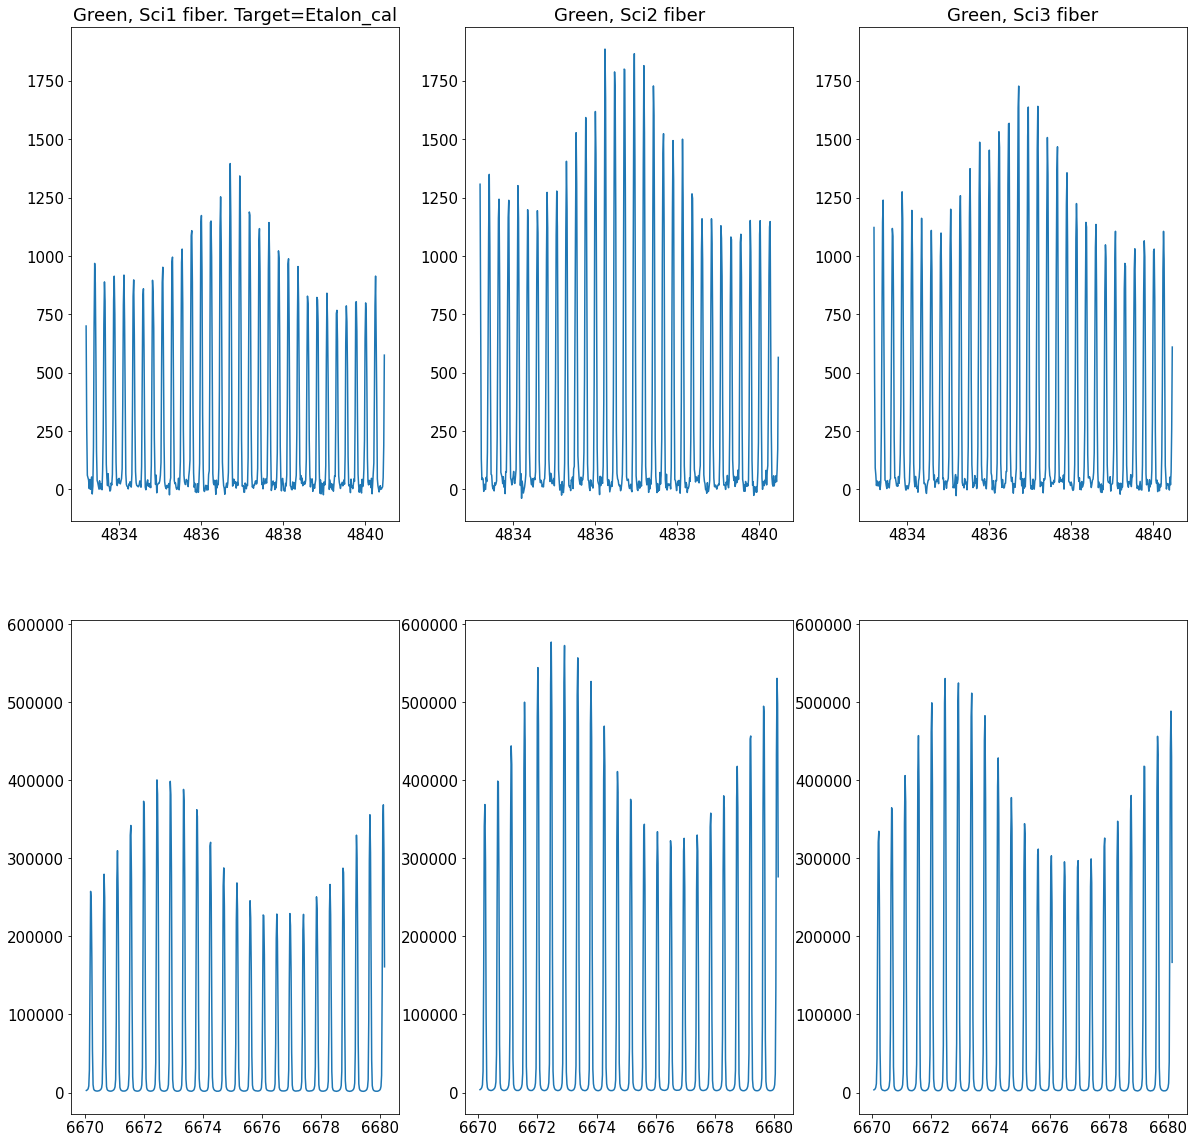

In [63]:
# Plot up Green and RED CCD.
fig1 = plt.figure(figsize=(20,20))
ax1  = plt.subplot(2,3,1)
ax2  = plt.subplot(2,3,2,sharex=ax1,sharey=ax1)
ax3  = plt.subplot(2,3,3,sharex=ax1,sharey=ax1)
ax4  = plt.subplot(2,3,4)
ax5  = plt.subplot(2,3,5,sharex=ax4,sharey=ax4)
ax6  = plt.subplot(2,3,6,sharex=ax4,sharey=ax4)

plt.rcParams.update({'font.size':15})

obj_name = hdu_hd['OBJECT']
ax1.set(title="Green, Sci1 fiber. Target="+obj_name ) #xlabel=" Noyes Rotation Period [d]", ylabel="David Rotation Period [d]",       xlim=[0,60], ylim=[0,60]) # Some values of off the right of the plot
ax2.set(title="Green, Sci2 fiber" )
ax3.set(title="Green, Sci3 fiber" )
#ax4.set(title="Green, first order, chip4" )


ord=10
p1 = 2000
p2 = 2500

ax1.plot(l1g_wav1[ord,p1:p2],l1g_sci1[ord,p1:p2])
ax2.plot(l1g_wav2[ord,p1:p2],l1g_sci2[ord,p1:p2])
ax3.plot(l1g_wav3[ord,p1:p2],l1g_sci3[ord,p1:p2])


ax4.plot(l1r_wav1[ord,p1:p2],l1r_sci1[ord,p1:p2])
ax5.plot(l1r_wav2[ord,p1:p2],l1r_sci2[ord,p1:p2])
ax6.plot(l1r_wav3[ord,p1:p2],l1r_sci3[ord,p1:p2])



In [11]:
# Open some HIRES data and compare the ThAr wavelength solutions.
# Focus on 500nm to 600nm, and only work with the HIRES middle chip.
hires_wls_fname = "/Users/hisaacson/data/mir3/keck_rwav.fits"
hires_wls_hdu = fits.open(hires_wls_fname)
hires_wls = hires_wls_hdu[0].data /10.
hires_wls_flat = hires_wls.flatten()

# Now open a HIRES Thorium for comparison.
# hwave.info()
# print(np.min(data1),np.max(data1))
# Combine the HIRES wls into a single array
hires_thar_fname = "/Users/hisaacson/data/mir3/iodfits/rj138.16.fits"
hires_th_hdu = fits.open(hires_thar_fname)
hires_th = hires_th_hdu[0].data
hires_th_hdu.info()
hires_th_flat = hires_th.flatten()

Filename: /Users/hisaacson/data/mir3/iodfits/rj138.16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     722   (4021, 16)   float32   


In [12]:
# found one observation of Neon with Thorium.
# j16.logsheet1:110   thar            n   3:30:33     1  bg14,B5, ThAr1 (w/ Neon!)
# j16.logsheet1:109   thar            n   3:30:33     1  bg14,B5 , ThAr2  (normal ThAr for comparison)

hires_thar_b5_fname = "/Users/hisaacson/data/mir3/iodfits/rj16.109.fits"  # B5 ThAr for comparison
hires_th_neon_fname = "/Users/hisaacson/data/mir3/iodfits/rj16.110.fits"  # B5 Th-Neon

hires_tharb5_hdu   = fits.open(hires_thar_b5_fname)
hires_thar_b5      = hires_tharb5_hdu[0].data
hires_thar_b5_flat = hires_thar_b5.flatten()
hires_th_neon_hdu  = fits.open(hires_th_neon_fname)
hires_th_neon      = hires_th_neon_hdu[0].data
hires_th_neon_flat = hires_th_neon.flatten()

In [13]:
print(len(hires_wls_flat),len(hires_th_flat))

64336 64336


NameError: name 'kpf_th' is not defined

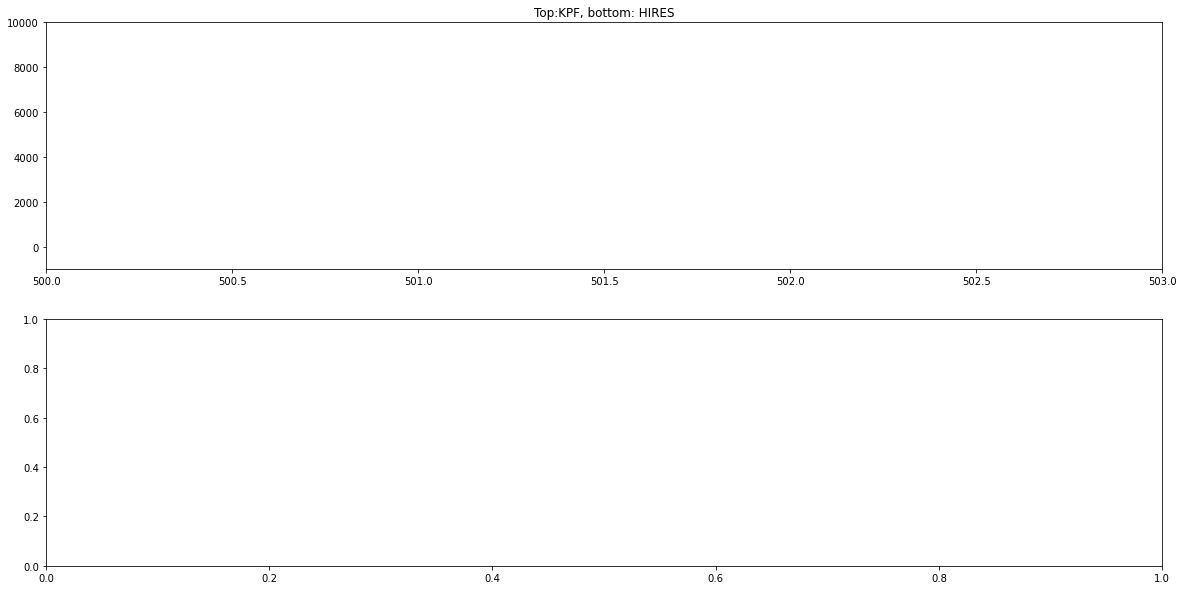

In [14]:
# Start with order 0 on HIRES and overplot the KPF spectrum
plt.figure(figsize=(20,10))
ax   = plt.subplot(2,1,1)
ax2  = plt.subplot(2,1,2)#,sharex=ax,sharey=ax)

ax.set(xlim=[500,503],ylim=[-1e3,1e4], title = "Top:KPF, bottom: HIRES")
ax.plot(kpf_th.wave,kpf_th.flux)   # KPF


ax2.plot(hires_wls_flat,hires_th_flat)
ax2.set(xlim=[500,503],ylim=[0,3e5])   #HIRES
#plt.ylim(0,0.3e10)


NameError: name 'kpf_th' is not defined

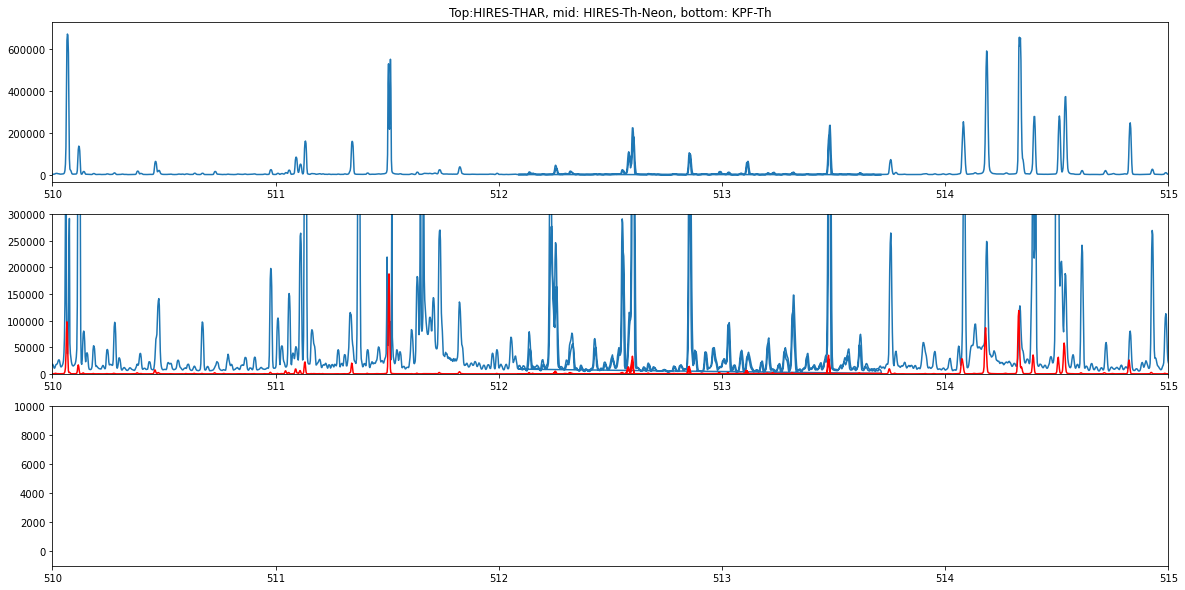

In [15]:
# Start with order 0 on HIRES. Plot the Th-Ar and Th-neon
plt.figure(figsize=(20,10))
ax   = plt.subplot(3,1,1)
ax2  = plt.subplot(3,1,2)#,sharex=ax,sharey=ax)
ax3  = plt.subplot(3,1,3)

x1=510
x2=515

ax.set(xlim=[x1,x2], title = "Top:HIRES-THAR, mid: HIRES-Th-Neon, bottom: KPF-Th")
ax.plot(hires_wls_flat,hires_thar_b5_flat)   # HIRES_THAR

ax2.plot(hires_wls_flat,hires_th_neon_flat) # HIRES_ThNeon
ax2.plot(hires_wls_flat,hires_th_flat,c='r')      # HIRES-thar-D5

ax2.set(xlim=[x1,x2],ylim=[0,3e5])   #HIRES_TH-Neon

ax3.set(xlim=[x1,x2],ylim=[-1e3,1e4])
ax3.plot(kpf_th.wave,kpf_th.flux)
#plt.ylim(0,0.3e10)
